[[  9.77075874   3.27621022]
 [ -9.71349666  11.27451802]
 [ -6.91330582  -9.34755911]
 [-10.86185913 -10.75063497]
 [ -8.50038027  -4.54370383]]
[1 0 2 2 2]


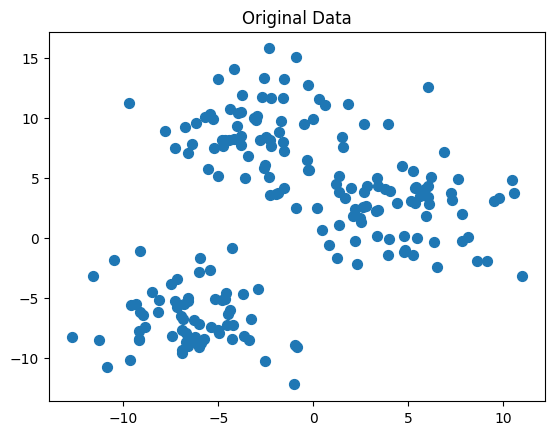

[[ 2.13082109  0.25604351]
 [-1.52698523  1.41036744]
 [-1.00130152 -1.56583175]
 [-1.74256891 -1.76832509]
 [-1.29924521 -0.87253446]]


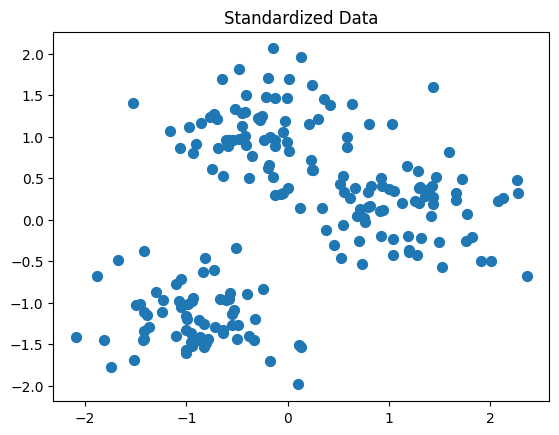

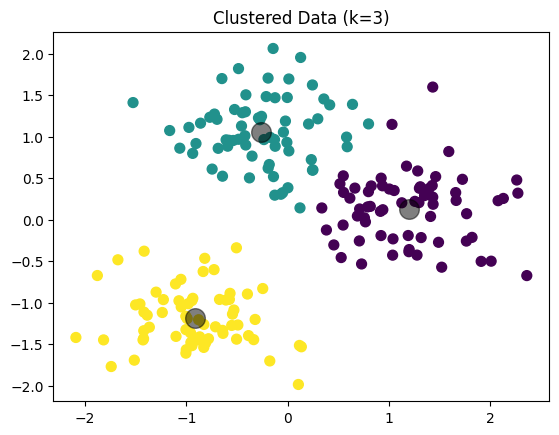

Inertia: 74.57960106819854
Cluster Centers:
 [[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]
Number of Iterations: 10


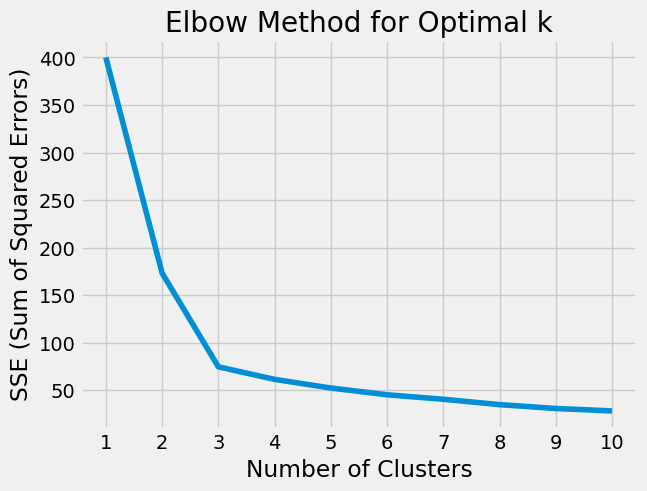

Optimal number of clusters: 3


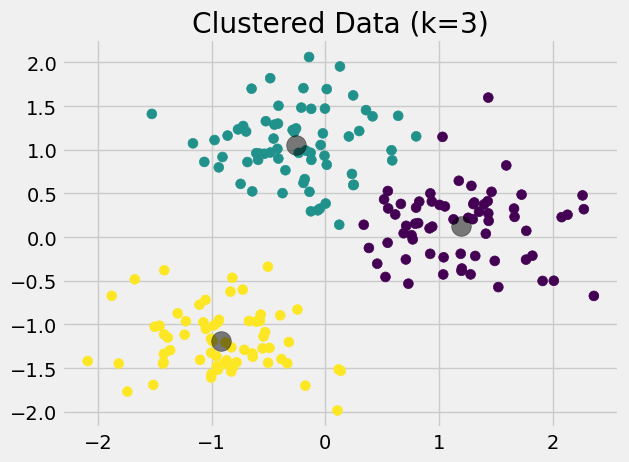

In [1]:
# Install required library
!pip install kneed

# Import libraries
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

# Visualize raw features
print(features[:5])
print(true_labels[:5])
plt.scatter(features[:, 0], features[:, 1], s=50)
plt.title("Original Data")
plt.show()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Visualize scaled features
print(scaled_features[:5])
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=50)
plt.title("Standardized Data")
plt.show()

# Apply initial KMeans clustering
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features)
y_pred = kmeans.predict(scaled_features)

# Visualize clustered data
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("Clustered Data (k=3)")
plt.show()

# Print KMeans results
print("Inertia:", kmeans.inertia_)
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Number of Iterations:", kmeans.n_iter_)

# Find optimal number of clusters using Elbow Method
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Find the 'elbow' point
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("Optimal number of clusters:", kl.elbow)

# Final clustering using the optimal k
kmeans = KMeans(init="random", n_clusters=kl.elbow, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features)
y_pred_final = kmeans.predict(scaled_features)

# Visualize final clustered data
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_pred_final, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title(f"Clustered Data (k={kl.elbow})")
plt.show()
